In [6]:
import numpy as np 
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)

In [7]:
def translate_matrix(a,b):
    return np.vstack(([1,0,a],[0,1,b],[0,0,1]))

In [8]:
def rotate_matrix(theta):
    return np.vstack(([np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1])) 

In [9]:
def reflect_line(a,b,c):
    return np.vstack([[b**2-a**2,-2*a*b,-2*a*c],[-2*a*b,a**2-b**2,-2*b*c],[0,0,a**2+b**2]])

In [10]:
def printMatrix(a,custom_color):
    #plt.xlim(0,1.5)
    plt.plot(a[0],a[1], 'k-,')
    plt.fill(a[0], a[1], color=custom_color)

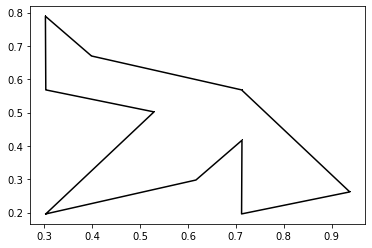

In [11]:
"""Original coordinates 
(0.3036, 0.1960), (0.6168, 0.2977), (0.7128,
0.4169), (0.7120, 0.1960), (0.9377, 0.2620), (0.7120, 0.5680), (0.3989, 0.6697), (0.3028,
0.7889), (0.3036, 0.5680), and (0.5293, 0.5020).
"""

# added last vector to connect first and last point since we will have to transform the added line segment anyways
x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
#adding a row of 1 to make the matrix compatiable with homogenous transformations
z=11*[1]
#combining the rows into a single matrix: A

A=np.vstack((x,y,z))
#plotting the bird 
plt.plot(A[0],A[1], 'k-,')

In [12]:
def generate_first_Tile(A,theta,a,b):
 
    #generate matrices for transformation
    t1=translate_matrix(a,b)
    r=rotate_matrix(theta)
    t2=translate_matrix(-a,-b)
    
    #combine matricies 
    T=np.matmul(r,t2)
    T=np.matmul(t1,T)
    return np.matmul(T,A)

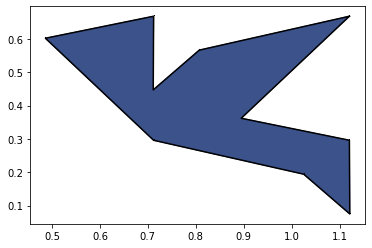

In [13]:
#plot original bird tile
#declare constants 
theta=np.pi
a=.7120
b=.4320

A1=generate_first_Tile(A,theta,a,b)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")

i. Create the first tile by rotating the model bird through π radians about the
point (0.7120, 0.4320). Provide the matrix for the transformation in homogeneous
coordinates.
We start with the translation:
$$
\begin{matrix}
1 & 0 & -0.7120\\
0 & 1 & -.432\\
0 & 0 & 1
\end{matrix}
$$

Then the rotation:
$$
\begin{matrix}
cos(\theta) & -sin(\theta) & 0\\
sin(\theta) & cos(\theta) & 0\\
0 & 0 & 1
\end{matrix}
$$

Now translate to the desired point, which results in our A matrix:
$$
\begin{matrix}
-1 & 0 & 1.424\\
0 & -1 & .864\\
0 & 0 & 1
\end{matrix}
$$

In [14]:
def generate_second_Tile(A,a,b,c,t1,t2):
    r=reflect_line(a,b,c)
    t=translate_matrix(t1,t2)
    T=np.matmul(r,t)
    return np.matmul(T,A)

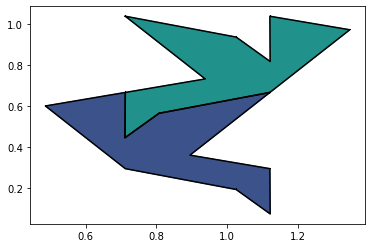

In [15]:
A2=generate_second_Tile(A,0,1,-.6180,.4084,0)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")
#print modified bird (Tile1)
printMatrix(A2,"#21918c")

ii. Form the second tile by reflecting the model bird through the horizontal line y = 0.6180 and then translating this image by 0.4084 units along the x-axis. Provide the matrix for the transformation in homogeneous coordinates.
First we have the reflection matrix:
$$
\begin{matrix}
1 & 0 & -1.236\\
0 & -1 & 1.236\\
0 & 0 & 1
\end{matrix}
$$

Then we have our translation Matrix along the x-axis:
$$
\begin{matrix}
1 & 0 & .4084\\
0 & 1 & 0\\
0 & 0 & 1
\end{matrix}
$$

This will result in:
$$
\begin{matrix}
1 & 0 & -0.8276\\
0 & -1 & 1.236\\
0 & 0 & 1
\end{matrix}
$$


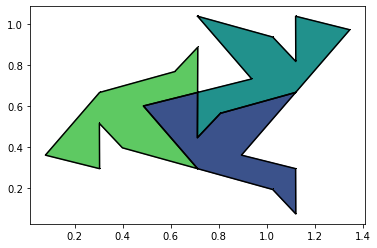

In [16]:
A3=generate_second_Tile(A,1,0,-.5078,0,.1)
#print modified bird (Tile1)
printMatrix(A1,"#3b528b")
#print modified bird (Tile2)
printMatrix(A2,"#21918c")
#print modified bird (Tile3)
printMatrix(A3,"#5ec962")

iii. To create the third tile, reflect the model bird through the vertical line x = 0.5078 and translate the image by 0.1000 along the y-axis. Provide the matrix for the transformation in homogeneous coordinates.

First, we reflect through x=0.5078:
$$
\begin{matrix}
-1 & 0 & 1.0156\\
0 & 1 & 0\\
0 & 0 & 1
\end{matrix}
$$

Then, we have translation by 0.1000 along the y-axis:
$$
\begin{matrix}
1 & 0 & 0\\
0 & 1 & 0.1000\\
0 & 0 & 1
\end{matrix}
$$

This results in:
$$
\begin{matrix}
-1 & 0 & 1.0156\\
0 & 1 & 0.1000\\
0 & 0 & 1
\end{matrix}
$$

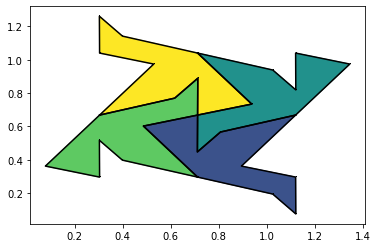

In [17]:
t=translate_matrix(0,.4720)
A4=np.matmul(t,A)

#print modified bird (Tile1)
printMatrix(A1,"#3b528b")

#print modified bird (Tile2)
printMatrix(A2,"#21918c")

#print modified bird (Tile3)
printMatrix(A3,"#5ec962")

#print modified bird (Tile4)
printMatrix(A4,"#fde725")

iv. Create the fourth tile by translating the model bird along the y-axis by 0.4720. Provide the matrix for the transformation in homogeneous coordinates.

We have translation by 0.4720 along the y-axis:
$$
\begin{matrix}
1 & 0 & 0\\
0 & 1 & 0.4720\\
0 & 0 & 1
\end{matrix}
$$

This results in:
$$
\begin{matrix}
1 & 0 & 0.712\\
0 & 1 & 0.904\\
0 & 0 & 1
\end{matrix}
$$

In [18]:
def plot_bird_cell(c1,c2):
    x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
    y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
    #adding a row of 1 to make the matrix compatiable with homogenous transformations
    z=11*[1]
    #combining the rows into a single matrix: A
    A=np.vstack((x,y,z))
    
    #First tile 
    A1=generate_first_Tile(A,np.pi,.7120,.4320)
    #Second Tile
    A2=generate_second_Tile(A,0,1,-.6180,.4084,0)
    #Third tile
    A3=generate_second_Tile(A,1,0,-.5078,0,.1)
    #Fourth tile
    t=translate_matrix(0,.4720)
    A4=np.matmul(t,A)
    
    #Apply transformation:
    T=translate_matrix(c1,c2)    
    A1=np.matmul(T,A1)
    A2=np.matmul(T,A2)
    A3=np.matmul(T,A3)
    A4=np.matmul(T,A4)
    
    #print modified bird (Tile1)
    printMatrix(A1,"#3b528b")
    printMatrix(A2,"#21918c")
    printMatrix(A3,"#5ec962")
    printMatrix(A4,"#fde725")

In [19]:
def tesselate_birds(horz,vert,a,b):
    for i in range(1,horz):
        for j in range(1,vert):
            plot_bird_cell(a*i,b*j)

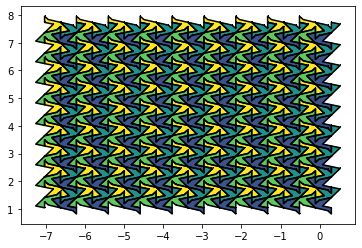

In [20]:
tesselate_birds(10,10,-.8168,.7441)